In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
import seaborn as sns
import sklearn

# Loading the Dataset

In [2]:
# !wget https://github.com/omkar3602/dementia-detection-dataset/raw/master/data.zip

In [3]:
# !unzip data.zip

In [4]:
df = pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# metadata 
print('''
1) Subject ID - ID of the individual subject
2) MRI ID - ID of the MRI scan
3) Group - Demented / Non Demented i.e. variable to be predicted
4) Visit - Count of visit of the subject
5) MR Delay - Instrument error
6) M/F - Gender
7) Hand - Dominant Hand
8) Age - Age of Subject
9) EDUC - Educational level of subject [years of education]
10) SES - Socio Economic Status
11) MMSE - Mini Mental State Exam - An all round test of the brain which can yield a max score of 30 being the healthiest 
12) CDR - Clinical Dementia Rating
13) eTIV - Estimated Total IntraCranial Volume
14) nWBV - Normalized Whole Brain Volume
15) ASF - Atlas Scaling Factor
''')


1) Subject ID - ID of the individual subject
2) MRI ID - ID of the MRI scan
3) Group - Demented / Non Demented i.e. variable to be predicted
4) Visit - Count of visit of the subject
5) MR Delay - Instrument error
6) M/F - Gender
7) Hand - Dominant Hand
8) Age - Age of Subject
9) EDUC - Educational level of subject [years of education]
10) SES - Socio Economic Status
11) MMSE - Mini Mental State Exam - An all round test of the brain which can yield a max score of 30 being the healthiest 
12) CDR - Clinical Dementia Rating
13) eTIV - Estimated Total IntraCranial Volume
14) nWBV - Normalized Whole Brain Volume
15) ASF - Atlas Scaling Factor



# Data Cleaning

In [6]:
print("\n Data Types of Columns")
df.dtypes


 Data Types of Columns


Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [7]:
print("Shape of Data")
df.shape

Shape of Data


(373, 15)

In [8]:
col = df.columns

print("\nNull Values in Each column\n")

for i in col:
    print(i , " = ", df[i].isnull().sum())


Null Values in Each column

Subject ID  =  0
MRI ID  =  0
Group  =  0
Visit  =  0
MR Delay  =  0
M/F  =  0
Hand  =  0
Age  =  0
EDUC  =  0
SES  =  19
MMSE  =  2
CDR  =  0
eTIV  =  0
nWBV  =  0
ASF  =  0


In [9]:
# fill null values with median as it is more robust
med_SES = df['SES'].median(skipna = True)
med_SES 


2.0

In [10]:
df['SES'].fillna(med_SES , inplace = True)

In [11]:
# no more null values in SES remain
df['SES'].isnull().sum()

0

In [12]:
# Similarly we clean the MMSE column too
med_MMSE = df['MMSE'].median(skipna=True)
df['MMSE'].fillna(med_MMSE , inplace=True)

In [13]:
# no more null values in MMSE remain
df['MMSE'].isnull().sum()

0

In [14]:
df.rename(columns = {"M/F" : "Gender"} , inplace = True)

In [15]:
# Our data is now ready for visualization and analysis 

# Data Visualization

In [16]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [17]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
df['Group'].unique()   # converted refers to people who were initially classified as non demented but later were classified as demented

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [19]:
males_total  = len(df[df['Gender'] == 'M'])
females_total = len(df[df['Gender'] == 'F'])

In [20]:
males_demented = len(df[ (df['Gender'] == 'M')   &  (df['Group'] != "Nondemented")  ])
females_demented = len(df[ (df['Gender'] == 'F')   &  (df['Group'] != "Nondemented")  ])

In [21]:
tot = []
tot.append(males_total)
tot.append(females_total)
tot

[160, 213]

In [22]:
dem = []
dem.append(males_demented)
dem.append(females_demented)
dem

[99, 84]

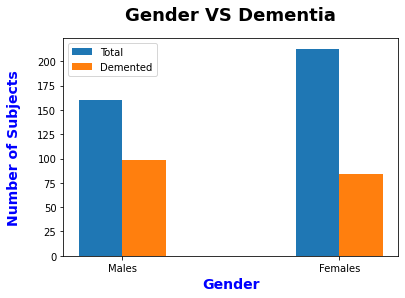

In [23]:
n = 2
X_axis = np.arange(n)
X = ['Males' , 'Females']

plt.bar(X_axis - 0.1   , tot , label = 'Total' , width = 0.2)
plt.bar(X_axis + 0.1 , dem , label = 'Demented' , width = 0.2)

plt.xticks(X_axis , X)
plt.xlabel("Gender" , color = "blue" , fontweight = "bold" , fontsize = 14)
plt.ylabel("Number of Subjects" , color = "blue" , fontweight = "bold" , fontsize = 14 , labelpad = 16)
plt.title("Gender VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.legend()
plt.show()

In [24]:
ses_cat = df['SES'].unique()

In [25]:
ses_cat.sort()

In [26]:
ses_cat
    

array([1., 2., 3., 4., 5.])

In [27]:
ses_dem = []

for i in ses_cat : 
    ses_dem.append(len( df[ (df['SES'] == i) & (df['Group'] != "Nondemented") ] ))

In [28]:
ses_dem

[47, 51, 40, 40, 5]

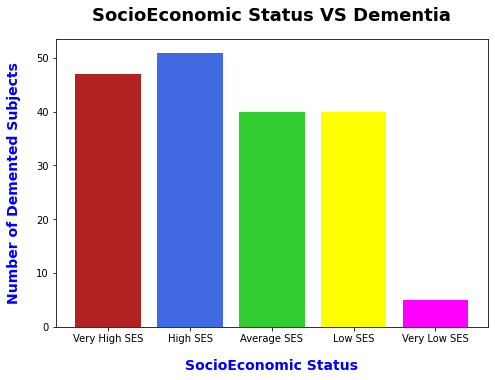

In [29]:
fig = plt.figure()
X = ['Very High SES' , 'High SES' , 'Average SES' , 'Low SES' , 'Very Low SES']
ax = fig.add_axes([0,0,1,1])
ax.bar(X , ses_dem , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('SocioEconomic Status' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Number of Demented Subjects' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("SocioEconomic Status VS Dementia", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

In [30]:
age = df['Age']
norm_brain = df['nWBV']
norm_brain = norm_brain*1000

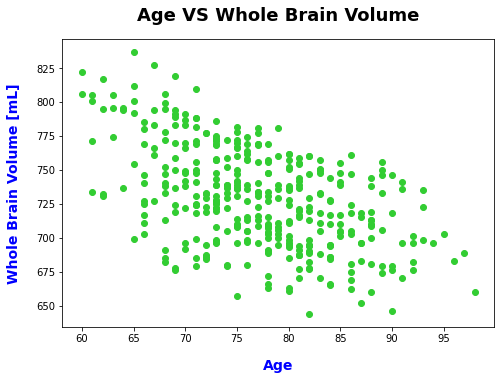

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(age,norm_brain , color = 'limegreen')
ax.set_xlabel('Age' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Whole Brain Volume [mL]' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title('Age VS Whole Brain Volume' , fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

In [32]:
cdr = df['CDR'].unique()
cdr

array([0. , 0.5, 1. , 2. ])

In [33]:
cdr_dem = []
cdr_tot = []
for i in cdr :
    cdr_dem.append(len(df[ (df['CDR'] == i)  &  (df['Group'] != 'Nondemented') ]))
    cdr_tot.append(len(df[df['CDR'] == i]))

    

In [34]:
cdr_perc = []
for i in range(4) : 
    cdr_perc.append( round(  ((cdr_dem[i] / cdr_tot[i])*100) , 2 ) ) 


cdr_perc 
    

[8.74, 98.37, 100.0, 100.0]

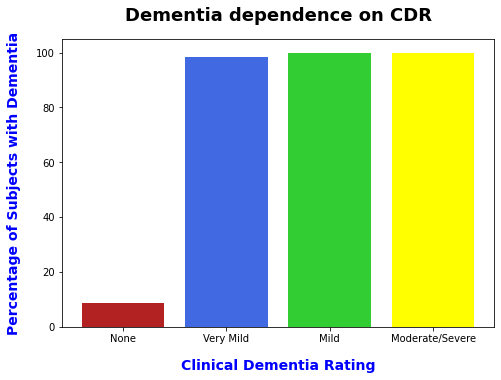

In [35]:
X = ['None' , 'Very Mild' , 'Mild' , 'Moderate/Severe']

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(X , cdr_perc , color = ['firebrick' , 'royalblue' , 'limegreen' , 'yellow' , 'magenta'])
ax.set_xlabel('Clinical Dementia Rating' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
ax.set_ylabel('Percentage of Subjects with Dementia' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
plt.title("Dementia dependence on CDR", fontweight = "bold" , fontsize = 18 , pad = 18)
plt.show()

In [36]:
m_dem = df.Age[((df['Group'] != "Nondemented") & (df['Gender'] == "M"))]
f_dem = df.Age[ (df['Group'] != "Nondemented") & (df['Gender'] == "F")]
m_nondem = df.Age[ (df['Group'] == "Nondemented") & (df['Gender'] == "M")]
f_nondem = df.Age[ (df['Group'] == "Nondemented") & (df['Gender'] == "F")]

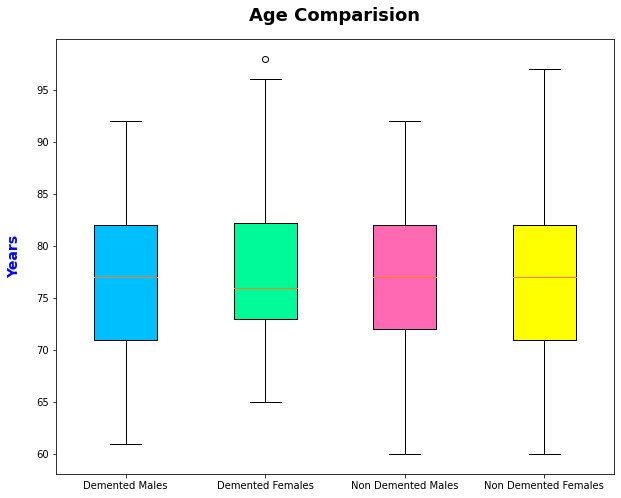

In [37]:
plot_data = [m_dem , f_dem , m_nondem , f_nondem]
lab = ["Demented Males" , "Demented Females" , "Non Demented Males" , "Non Demented Females"]
plt.figure(figsize = (10,8))
colors = ['deepskyblue' , 'mediumspringgreen' , 'hotpink' , 'yellow']
bplot = plt.boxplot(plot_data , labels = lab , patch_artist = True )


    
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Age Comparision", fontweight = "bold" , fontsize = 18 , pad = 18)

plt.ylabel('Years' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)

plt.show()

## Analysis

In [38]:
print('''

The analysis that has been carried out from the various graphs based on the data in the dataset are : 

1) Higher percentage of males are demented than females
2) The SES has little or no effect on dementia as almost all the different SES categories have the same number of demented subjects [very poor being the exception]
3) The Whole Brain Volume has a lot of variance for a given age however it has a slightly negative linear relation with age
4) Clinical Dementia Rating is highly correlated to our target variable. 100% of people with a CDR higher than 0.5 have been classified as demented.

''')



The analysis that has been carried out from the various graphs based on the data in the dataset are : 

1) Higher percentage of males are demented than females
2) The SES has little or no effect on dementia as almost all the different SES categories have the same number of demented subjects [very poor being the exception]
3) The Whole Brain Volume has a lot of variance for a given age however it has a slightly negative linear relation with age
4) Clinical Dementia Rating is highly correlated to our target variable. 100% of people with a CDR higher than 0.5 have been classified as demented.




# Data Preprocessing 

In [39]:
df['Hand'] = df['Hand'].replace(['R','L'], [0,1])

In [40]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [41]:
df['Gender'] = df['Gender'].replace(['F','M'], [0,1])


In [42]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [43]:
df['Group'] = df['Group'].replace(["Nondemented" , "Converted" , "Demented"] , [0,1,1])

In [44]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [45]:
# Categorical data has been converted into numerical data 
# 0 -> Non Demented    1 -> Demented   [for prediction] 
# 0 -> Male    1 -> Female   ,   0 -> Right Hand       1 -> Left Hand
# now we remove some irrelevant columns like visit , MRI ID , Subject Id and MR Delay as they arent necessary for the model 

In [46]:
df.drop(['Subject ID' , 'MRI ID' , 'Visit' , 'MR Delay'], axis = 1  , inplace = True)


In [47]:
df

,Group,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,1,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,0,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


## Correlation Mapping for Feature Removal

In [48]:
def plot_correlation_map( df ):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
    heatmap.set_ylim(10.0, 0)

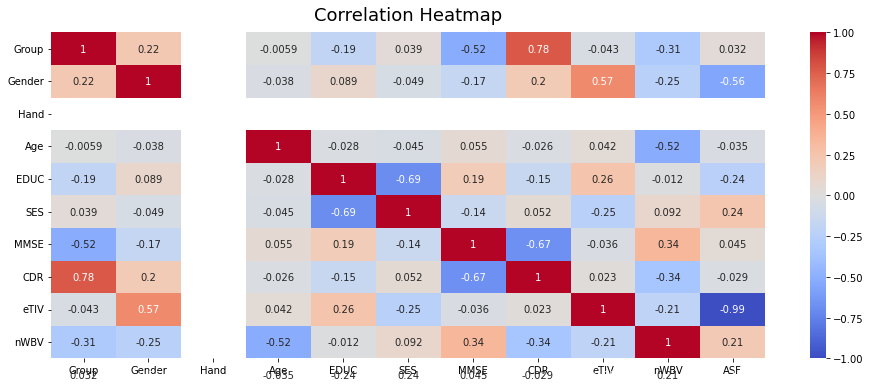

In [49]:
plot_correlation_map(df)

In [50]:
# from the corr. mapping we find the highly correlated features [ threshold here taken as |0.75| ]

# Group -> CDR
# ASF -> eTIV

# so we remove CDR and eTIV from our dataset 

# CDR is highly correlated with our target variable
# However a CDR test is taken generally after a person is confirmed as demneted or has some symptoms
# Since its  post prediction data we cannot use it to predict dementia and hence it will be removed

# ASF is a way of normalizing eTIV for different subjects
# Hence they are highly correlated
# Since ASF is standardized medical data we will be retaining it in our dataset 


In [51]:
df.drop(['CDR' , 'eTIV'], axis = 1  , inplace = True)
df


,Group,Gender,Hand,Age,EDUC,SES,MMSE,nWBV,ASF
0,0,1,0,87,14,2.0,27.0,0.696,0.883
1,0,1,0,88,14,2.0,30.0,0.681,0.876
2,1,1,0,75,12,2.0,23.0,0.736,1.046
3,1,1,0,76,12,2.0,28.0,0.713,1.010
4,1,1,0,80,12,2.0,22.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,1,1,0,82,16,1.0,28.0,0.694,1.037
369,1,1,0,86,16,1.0,26.0,0.675,1.040
370,0,0,0,61,13,2.0,30.0,0.801,1.331
371,0,0,0,63,13,2.0,30.0,0.796,1.323


## Data Normalization 

In [52]:
# Since we plan to deploy this model , we will be dividing the data with fixed values rather than the max 

In [53]:
df['Age'] = df['Age'] / 100
df['EDUC'] = df['EDUC'] / 100
df['MMSE'] = df['MMSE'] / 30 

In [54]:
df

,Group,Gender,Hand,Age,EDUC,SES,MMSE,nWBV,ASF
0,0,1,0,0.87,0.14,2.0,0.900000,0.696,0.883
1,0,1,0,0.88,0.14,2.0,1.000000,0.681,0.876
2,1,1,0,0.75,0.12,2.0,0.766667,0.736,1.046
3,1,1,0,0.76,0.12,2.0,0.933333,0.713,1.010
4,1,1,0,0.80,0.12,2.0,0.733333,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,1,1,0,0.82,0.16,1.0,0.933333,0.694,1.037
369,1,1,0,0.86,0.16,1.0,0.866667,0.675,1.040
370,0,0,0,0.61,0.13,2.0,1.000000,0.801,1.331
371,0,0,0,0.63,0.13,2.0,1.000000,0.796,1.323


# ML Models

## Train Test Split

In [55]:
X = df.drop('Group' , axis = 1)
X

,Gender,Hand,Age,EDUC,SES,MMSE,nWBV,ASF
0,1,0,0.87,0.14,2.0,0.900000,0.696,0.883
1,1,0,0.88,0.14,2.0,1.000000,0.681,0.876
2,1,0,0.75,0.12,2.0,0.766667,0.736,1.046
3,1,0,0.76,0.12,2.0,0.933333,0.713,1.010
4,1,0,0.80,0.12,2.0,0.733333,0.701,1.034
...,...,...,...,...,...,...,...,...
368,1,0,0.82,0.16,1.0,0.933333,0.694,1.037
369,1,0,0.86,0.16,1.0,0.866667,0.675,1.040
370,0,0,0.61,0.13,2.0,1.000000,0.801,1.331
371,0,0,0.63,0.13,2.0,1.000000,0.796,1.323


In [56]:
y = df['Group']
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

In [57]:
df

,Group,Gender,Hand,Age,EDUC,SES,MMSE,nWBV,ASF
0,0,1,0,0.87,0.14,2.0,0.900000,0.696,0.883
1,0,1,0,0.88,0.14,2.0,1.000000,0.681,0.876
2,1,1,0,0.75,0.12,2.0,0.766667,0.736,1.046
3,1,1,0,0.76,0.12,2.0,0.933333,0.713,1.010
4,1,1,0,0.80,0.12,2.0,0.733333,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,1,1,0,0.82,0.16,1.0,0.933333,0.694,1.037
369,1,1,0,0.86,0.16,1.0,0.866667,0.675,1.040
370,0,0,0,0.61,0.13,2.0,1.000000,0.801,1.331
371,0,0,0,0.63,0.13,2.0,1.000000,0.796,1.323


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,  test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=y)

In [59]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(261, 8) (112, 8) (261,) (112,)


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
tree = DecisionTreeClassifier(random_state = 5 , criterion = "gini" , max_depth = 4 )

In [62]:
tree = tree.fit(X_train , y_train )

In [63]:
from sklearn import metrics

def measure_performance(X_test,y_test, clf_mdl, show_accuracy=True , show_confusion_matrix = True , show_precision = True):
    y_pred=clf_mdl.predict(X_test)
    if show_accuracy:
        print ("Accuracy: {0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")
    
         
    if show_precision : 
        print("Precision :  {0:.3f}".format(metrics.precision_score(y_test,y_pred)),"\n")
        
        
    if show_confusion_matrix:
        print ("Confusion matrix\n\n")
        metrics.confusion_matrix(y_test,y_pred)
        print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True))
        
        


In [64]:
measure_performance(X_test , y_test , tree)

Accuracy: 0.741 

Precision :  0.795 

Confusion matrix


Predicted   0   1  All
Actual                
0          48   9   57
1          20  35   55
All        68  44  112


## Random Forest 

In [65]:
random_forest = RandomForestClassifier( criterion = "gini" , n_estimators = 15 )  

In [66]:
random_forest = random_forest.fit(X_train , y_train)

In [67]:
measure_performance(X_test , y_test , random_forest)

Accuracy: 0.795 

Precision :  0.820 

Confusion matrix


Predicted   0   1  All
Actual                
0          48   9   57
1          14  41   55
All        62  50  112


In [68]:
import pickle

with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f, protocol=pickle.HIGHEST_PROTOCOL)

## Naive Bayes 

In [69]:
from sklearn.naive_bayes import GaussianNB


In [70]:
guass_model = GaussianNB()

In [71]:
guass_model.fit(X_train,y_train)

GaussianNB()

In [72]:
measure_performance(X_test , y_test , guass_model)

Accuracy: 0.750 

Precision :  0.814 

Confusion matrix


Predicted   0   1  All
Actual                
0          49   8   57
1          20  35   55
All        69  43  112


## Support Vector Machines

In [73]:
from sklearn import svm

In [74]:
svm_model = svm.SVC(kernel = 'rbf')

In [75]:
svm_model.fit(X_train , y_train)

SVC()

In [76]:
measure_performance(X_test , y_test , svm_model)

Accuracy: 0.643 

Precision :  0.660 

Confusion matrix


Predicted   0   1  All
Actual                
0          41  16   57
1          24  31   55
All        65  47  112


## Neural Network 

### Keras Neural Net 

In [77]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [78]:

model=Sequential()

model.add(Dense(units=32,kernel_initializer='normal',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))

model.add(Dense(units=128,kernel_initializer='normal',activation='relu'))

model.add(Dense(units=1,kernel_initializer='normal',activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,849
Trainable params: 10,849
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience = 10)
history=model.fit(X_train,y_train,batch_size=16,epochs=500 , callbacks = [es] , validation_data = (X_test , y_test))

Epoch 1/500
17/17 [==============================] - 2s 31ms/step - loss: 0.6935 - accuracy: 0.4866 - val_loss: 0.6925 - val_accuracy: 0.4911
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5900 - val_loss: 0.6914 - val_accuracy: 0.5982
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.4981 - val_loss: 0.6894 - val_accuracy: 0.5893
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.6360 - val_loss: 0.6836 - val_accuracy: 0.5982
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.6360 - val_loss: 0.6712 - val_accuracy: 0.5982
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6245 - val_loss: 0.6591 - val_accuracy: 0.6518
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.6322 - val_loss: 0.6497 - val_accuracy: 0.6429
Epoch 8/500


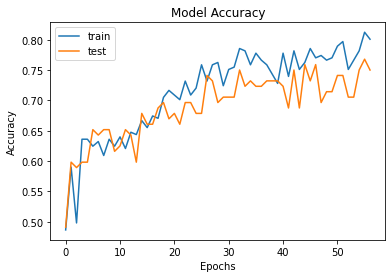

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

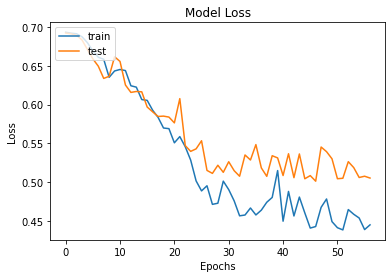

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
y_pred=model.predict(X_test)   
n= 0 
for i in y_pred :
    if i < 0.5 : 
        y_pred[n] = 0
        n = n + 1
    else :
        y_pred[n] = 1
        n = n + 1
        


In [85]:
y_pred = array(y_pred)

In [86]:
print ("Accuracy: {0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")
print("Precision :  {0:.3f}".format(metrics.precision_score(y_test,y_pred)),"\n")
print ("Confusion matrix\n\n")
print(metrics.confusion_matrix(y_test,y_pred))
        


Accuracy: 0.750 

Precision :  0.765 

Confusion matrix


[[45 12]
 [16 39]]


# Comparision of Models

In [87]:
labels = ["Decision Tree" , "Random Forest" , "Naive Bayes" , "Support Vector Machine" , "Neural Net"]
Accuracy = [0.839 , 0.875 , 0.821 , 0.634 , 0.804]
Precision = [0.863 , 0.956 , 0.927 , 0.635 , 0.851]

In [88]:
d = {'Model': labels, 'Accuracy': Accuracy , 'Precision' : Precision}
model_rep = pd.DataFrame(data=d)
model_rep

,Model,Accuracy,Precision
0,Decision Tree,0.839,0.863
1,Random Forest,0.875,0.956
2,Naive Bayes,0.821,0.927
3,Support Vector Machine,0.634,0.635
4,Neural Net,0.804,0.851


In [89]:
def plot_chart(y , para):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_axes([0,0,1,1])
    ax.bar(labels , y , color = ['deepskyblue' , 'mediumspringgreen' , 'hotpink' , 'yellow' , 'salmon' , 'mediumorchid'])
    ax.set_xlabel('Models' , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
    ax.set_ylabel(para , color = 'blue' , fontweight = 'bold' , fontsize = 14 , labelpad = 15)
    plt.title("Model " + para , fontweight = "bold" , fontsize = 18 , pad = 18)
    plt.show()

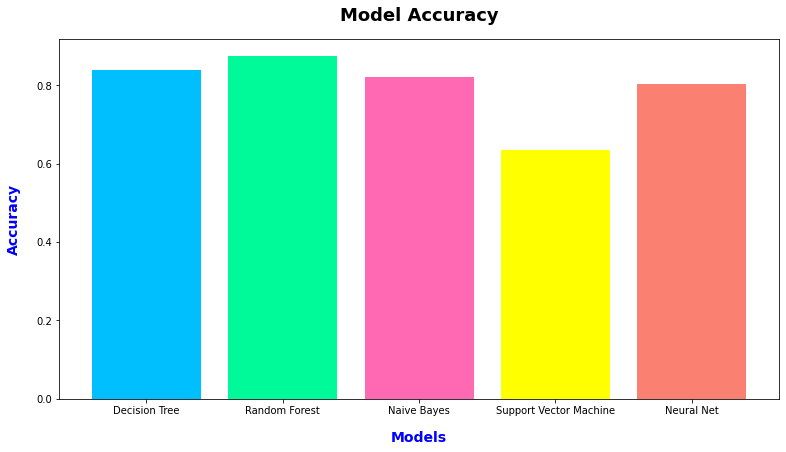

In [90]:
plot_chart(Accuracy , "Accuracy")

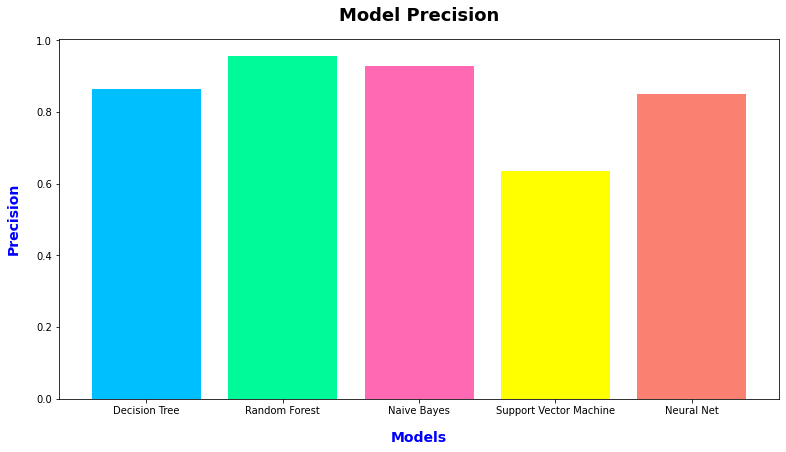

In [91]:
plot_chart(Precision , "Precision")